<H1> Importing and Exploring Provided Datasets </H1>

<H4> Import the necessary packages.</H4>

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

*Bring in the file names for easy access.*

In [8]:
zippedData = ['bom.movie_gross.csv.gz','imdb.name.basics.csv.gz','imdb.title.akas.csv.gz',
              'imdb.title.basics.csv.gz','imdb.title.crew.csv.gz',
              'imdb.title.principals.csv.gz','imdb.title.ratings.csv.gz',
              'rt.movie_info.tsv.gz','rt.reviews.tsv.gz','tmdb.movies.csv.gz',
              'tn.movie_budgets.csv.gz']

In [9]:
bom_movie_gross = pd.read_csv("zippedData/{}".format(zippedData[0]))
imdb_name = pd.read_csv("zippedData/{}".format(zippedData[1]))
imdb_title_aka = pd.read_csv("zippedData/{}".format(zippedData[2]))
imdb_title_basics = pd.read_csv("zippedData/{}".format(zippedData[3]))
imdb_title_crew = pd.read_csv("zippedData/{}".format(zippedData[4]))
imdb_title_principals = pd.read_csv("zippedData/{}".format(zippedData[5]))
imdb_title_rating = pd.read_csv("zippedData/{}".format(zippedData[6]))
rt_movie_info = pd.read_csv("zippedData/{}".format(zippedData[7]),sep='\t')
df8 = pd.read_csv("zippedData/{}".format(zippedData[8]),sep='\t',encoding='latin1')
tmdb_movies = pd.read_csv("zippedData/{}".format(zippedData[9]))
tn_movie_budget = pd.read_csv("zippedData/{}".format(zippedData[10]))

In [10]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
imdb=imdb_title_rating.merge(imdb_title_principals,on='tconst')
imdb=imdb.merge(imdb_title_basics,on='tconst')
imdb=imdb.merge(imdb_name,on='nconst')
imdb=imdb.merge(imdb_title_crew,on='tconst')




In [13]:
imdb=imdb_title_rating.merge(imdb_title_principals,on='tconst')
imdb=imdb.merge(imdb_title_basics,on='tconst')
imdb=imdb.merge(imdb_name,on='nconst')
imdb=imdb.merge(imdb_title_crew,on='tconst')
imdb=imdb[['original_title','genres','start_year','averagerating']].where(imdb['start_year']>2000)
imdb=imdb.drop_duplicates('original_title')
imdb

,original_title,genres,start_year,averagerating
0,Laiye Je Yaarian,Romance,2019,8.3
10,Bhajjo Veero Ve,"Comedy,Drama,Romance",2018,8.3
20,Thug Life,Comedy,2017,6.4
30,Daddy Cool Munde Fool,"Comedy,Romance",2013,6.4
40,Ronde Sare Vyah Picho,Comedy,2013,6.9
...,...,...,...,...
629578,Heroes,Documentary,2019,7.3
629580,Postarica Ruza,Comedy,2016,9.0
629583,Hondar 2050,Documentary,2018,8.6
629586,Happy Birthday Hannah,Horror,2018,3.5


In [14]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
pd.to_datetime(tmdb_movies['release_date'])

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

<AxesSubplot:xlabel='release_date', ylabel='popularity'>

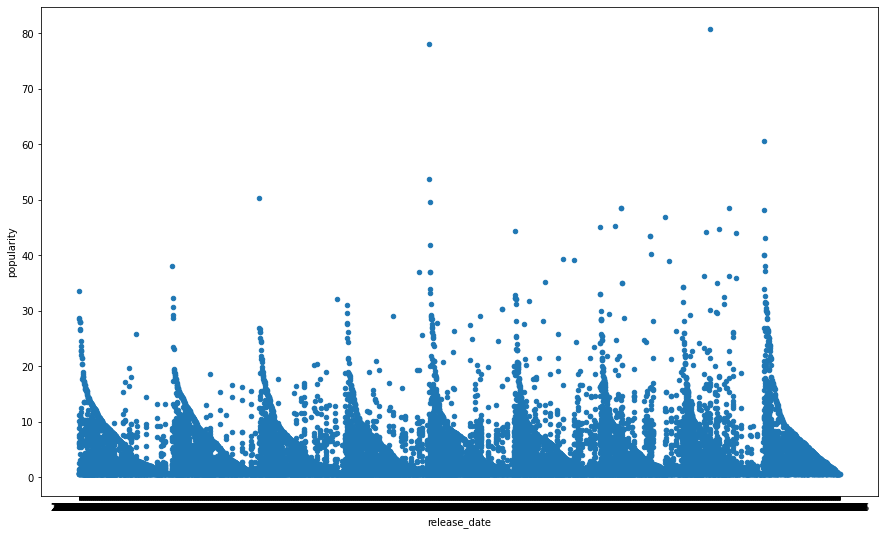

In [15]:
tmdb_movies.plot('release_date','popularity',kind='scatter',figsize=(15,9))

In [13]:
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
